In [1]:
## Second Practice Project
## Titanic survived Project

In [2]:
## Now importing the necessart libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor

In [4]:
## Import Data set

In [5]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## we can see that upper there are null in this dataset.
## so we can check thru isnull to confrim

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
## Majority cells are empty and for 'Cabin' we will delete this column and Impute values for 'Age'.

## We need to use Iterative Imputer for Imputing these, But firstly we have to encode the categorical columns

## We need to use Label Encoder for encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [12]:
df_sex = lab.fit_transform(df['Sex'])
pd.Series(df_sex)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [13]:
df['Sex'] = df_sex
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [14]:
## We need to impute value for Embarked coloumn also

In [15]:
df_embarked = lab.fit_transform(df['Embarked'])
pd.Series(df_embarked)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [16]:
df['Embarked'] = df_embarked
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [17]:
from sklearn.experimental import enable_iterative_imputer

In [18]:
from sklearn.impute import IterativeImputer

In [19]:
iter_impute = IterativeImputer()
ite_imp = pd.DataFrame(iter_impute.fit_transform
                      (df[['Age','Embarked']]),
                      columns = ['Age','Embarked'])
ite_imp

,Age,Embarked
0,22.000000,2.0
1,38.000000,0.0
2,26.000000,2.0
3,35.000000,2.0
4,35.000000,2.0
...,...,...
886,27.000000,2.0
887,19.000000,2.0
888,29.698603,2.0
889,26.000000,0.0


In [20]:
df.drop(['PassengerId','Name','Ticket','Cabin','Age','Embarked'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,0,0,0,30.0000
888,0,3,0,1,2,23.4500
889,1,1,1,0,0,30.0000


In [21]:
df = df.join(ite_imp)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,1,1,0,7.2500,22.000000,2.0
1,1,1,0,1,0,71.2833,38.000000,0.0
2,1,3,0,0,0,7.9250,26.000000,2.0
3,1,1,0,1,0,53.1000,35.000000,2.0
4,0,3,1,0,0,8.0500,35.000000,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,27.000000,2.0
887,1,1,0,0,0,30.0000,19.000000,2.0
888,0,3,0,1,2,23.4500,29.698603,2.0
889,1,1,1,0,0,30.0000,26.000000,0.0


In [22]:
## Now we have deleted all the unnecessary columns.
## We have filled all the null values.
## Now we can check the skewness.

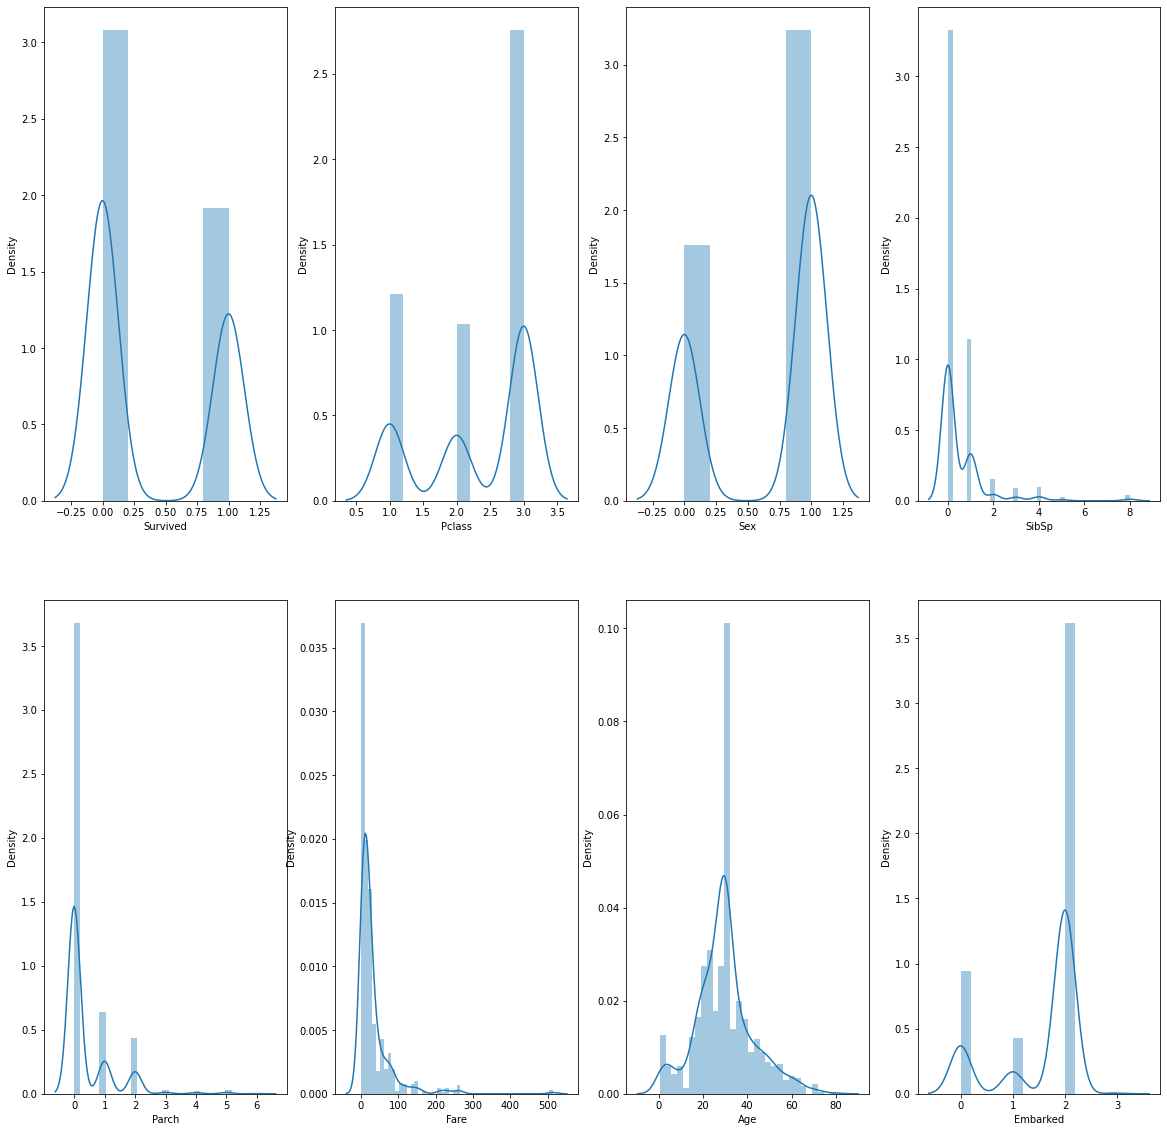

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [24]:
## We can see, there is skewness in some columns - SibSp, Parh, Fare, Age and Embarked. 
## Now we will use zscore to remove this skewness

In [25]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df[['SibSp', 'Parch', 'Fare', 'Age', 'Embarked']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,1,1,0,7.2500,22.000000,2.0
1,1,1,0,1,0,71.2833,38.000000,0.0
2,1,3,0,0,0,7.9250,26.000000,2.0
3,1,1,0,1,0,53.1000,35.000000,2.0
4,0,3,1,0,0,8.0500,35.000000,2.0
5,0,3,1,0,0,8.4583,29.699887,1.0
6,0,1,1,0,0,51.8625,54.000000,2.0
7,0,3,1,3,1,21.0750,2.000000,2.0
8,1,3,0,0,2,11.1333,27.000000,2.0
9,1,2,0,1,0,30.0708,14.000000,0.0


In [26]:
## Again check the skewness 

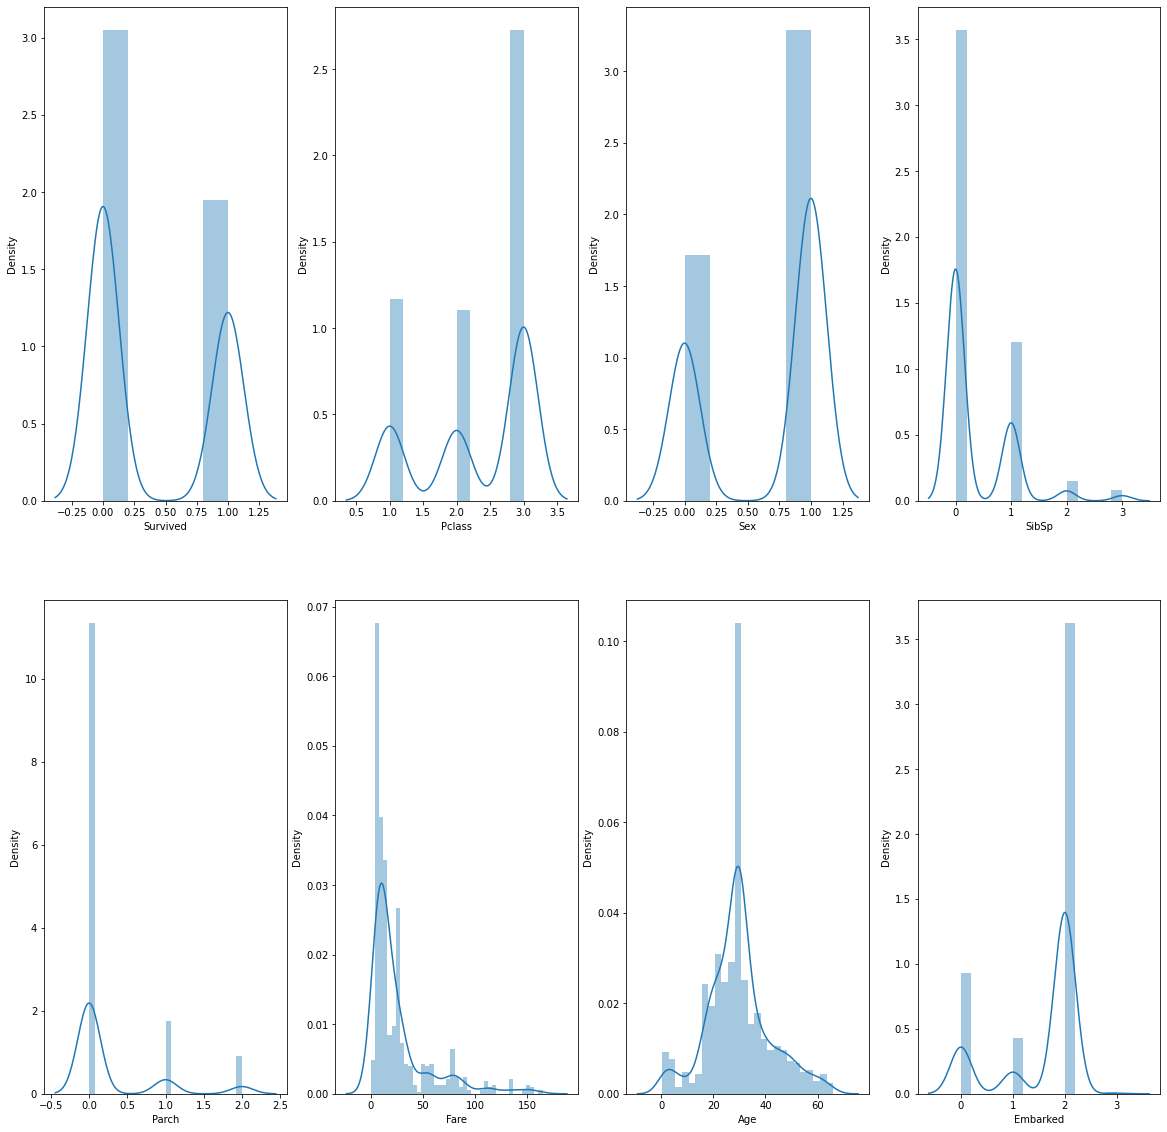

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [28]:
## Now we can see the skewness has improved

## We should now check the Heatmap, to ensure there is no multi-collinearity problem occuring 
## which may lead to overfitting our model

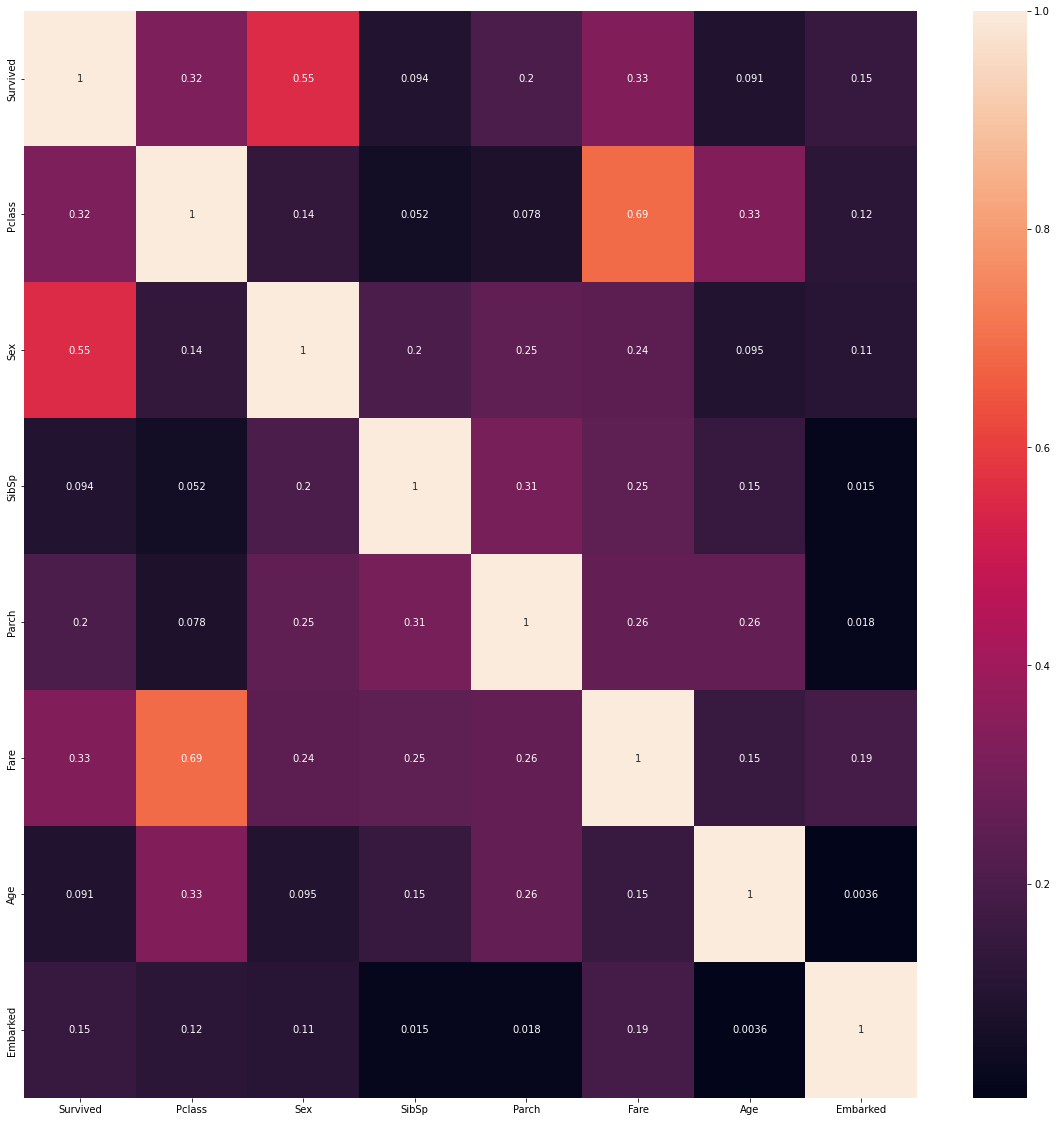

In [29]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

In [30]:
## We can see that in Fare and Pclass show collinearity, we need to do further analysis for it

<function matplotlib.pyplot.show(close=None, block=None)>

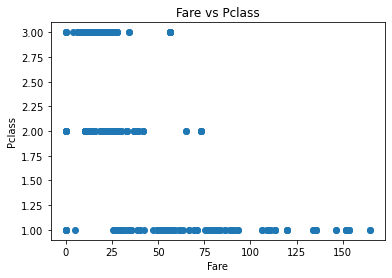

In [31]:
plt.scatter(df['Fare'], df['Pclass'])
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.title('Fare vs Pclass')
plt.show

In [32]:
## We can see that Fare and Pclass shows some relation, but not enought to delete so we need to continue 

In [33]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [34]:
x

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,1,1,0,7.2500,22.000000,2.0
1,1,0,1,0,71.2833,38.000000,0.0
2,3,0,0,0,7.9250,26.000000,2.0
3,1,0,1,0,53.1000,35.000000,2.0
4,3,1,0,0,8.0500,35.000000,2.0
...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,27.000000,2.0
887,1,0,0,0,30.0000,19.000000,2.0
888,3,0,1,2,23.4500,29.698603,2.0
889,1,1,0,0,30.0000,26.000000,0.0


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [36]:
## For accurate predictions, we need to balance our target variable
## Check balance using Counter

In [37]:
from collections import Counter
Counter(y)

Counter({0: 500, 1: 320})

In [38]:
## We can see that our target variable is slightly imbalanced and 
## we need to balance it.

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
x_train1,x_test,y_train1,y_test = train_test_split(x,y,test_size=0.25,random_state=69)

In [41]:
Counter(y_train1)

Counter({0: 379, 1: 236})

In [42]:
sm = SMOTE(sampling_strategy=0.8)

In [43]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 379, 1: 236}) 
Classes after fitCounter({0: 379, 1: 303}) 


In [44]:
## Now that we have balanced our target variable.
## we can begin Model Training and Testing.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score,classification_report, roc_curve, roc_auc_score, plot_roc_curve

In [56]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [57]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 80.79%

 ======TESTING RESULT======
Accuracy Score: 77.07%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       121
           1       0.71      0.74      0.73        84

    accuracy                           0.77       205
   macro avg       0.76      0.77      0.76       205
weighted avg       0.77      0.77      0.77       205



In [58]:
## We can see tha our Training Accuracy in Logoistics Regression is 80.79% and in Testing 77.07%.
## We can see that Training and Testing data are close, so we can say that model is not overfitting.

In [59]:
## We should try more test with other models to check the best result

In [60]:
from xgboost import XGBClassifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
xgb = XGBClassifier()

In [66]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
## Checking the Accuracy
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7707317073170732
0.7024390243902439
0.7902439024390244
0.8
0.8439024390243902


In [68]:
## Now that we have checked the accuracy for all models.
## We should plot the ROC-AUC curve to check the best fit model.

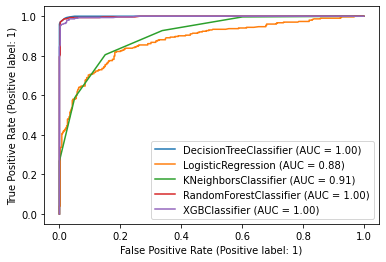

In [69]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

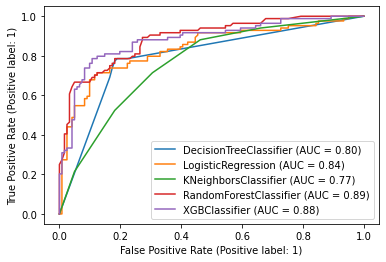

In [70]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
## Now we can see that below points from above graph
## Decision Tree, Random Forest and XGB have perfect or near perfect learning rate on training data.
## Logistic Regression will be my model of choice
## Although great learning rate, the accuracy for Decision Tree, KNeghbors, RandomfOREST and XGB are very 
## low in comparison: Model is Overfitting a lot
## Logistic Regression has poorer testing and training accuracy but no overfitting problem.